# Analysis of Test Datasets

In [6]:
import cv2
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

def calculate_pixel_changes_and_show(video_path):
    # Initialize the video capture
    cap = cv2.VideoCapture(video_path)
    
    # Read the first frame
    ret, prev_frame = cap.read()
    if not ret:
        print("Failed to read the video")
        return None
    
    # Convert the frame to grayscale
    prev_frame_gray = cv2.cvtColor(prev_frame, cv2.COLOR_BGR2GRAY)
    
    # Initialize a list to store the results
    results = []
    
    # Frame number counter
    frame_number = 0
    
    # Loop through all frames in the video
    while True:
        # Read the next frame
        ret, frame = cap.read()
        if not ret:
            break
        
        # Convert the current frame to grayscale
        frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        
        # Calculate the absolute difference between the current frame and the previous frame
        frame_diff = cv2.absdiff(frame_gray, prev_frame_gray)
        
        # Create a binary mask where changes greater than 1 are set to 255
        _, mask = cv2.threshold(frame_diff, 1, 255, cv2.THRESH_BINARY)
        
        # Count the number of pixels with intensity change greater than 1
        num_changes = np.sum(mask > 0)
        
        # Calculate the total number of pixels
        total_pixels = mask.size
        
        # Calculate the percentage of changed pixels
        percentage_change = (num_changes / total_pixels) * 100
        
        # Record the frame number and percentage change
        results.append((frame_number, percentage_change))
        
        # Display the original frame and the mask
        # cv2.imshow('Original Frame', frame)
        # cv2.imshow('Changed Pixels Mask', mask)
        
        # Wait for 1 ms before moving to the next frame
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
        
        # Update the previous frame
        prev_frame_gray = frame_gray
        
        # Increment the frame number
        frame_number += 1
    
    # Release the video capture and destroy all windows
    cap.release()
    cv2.destroyAllWindows()
    
    # Create a DataFrame from the results
    df = pd.DataFrame(results, columns=['Frame_Number', 'Percentage_Change'])
    
    return df

def process_video_directory(directory_path, output_csv_path):
    all_results = []
    
    # Iterate over all files in the directory
    for filename in os.listdir(directory_path):
        if filename.endswith(".mp4") or filename.endswith(".avi"):
            video_path = os.path.join(directory_path, filename)
            print(f"Processing video: {video_path}")
            
            # Calculate pixel changes and show frames for each video
            df_changes = calculate_pixel_changes_and_show(video_path)
            
            if df_changes is not None:
                # Add a column for the video filename
                df_changes['Video'] = filename
                all_results.append(df_changes)
    
    if all_results:
        # Concatenate all DataFrames
        final_df = pd.concat(all_results, ignore_index=True)
        
        # Save the DataFrame to a CSV file
        final_df.to_csv(output_csv_path, index=False)
        print(f"Results saved to {output_csv_path}")
        
        return final_df
    else:
        print("No valid videos found or processed.")
        return None



In [7]:
csv_directory = './Experiments/Test_Dataset_BG_Changes'

# Iterate over all files in the directory. Import the csvs and append the 'Percentage_Change' column to a dataframe called bg_changes. Rename the column to the video name.
bg_changes = pd.DataFrame()
for filename in os.listdir(csv_directory):
    if filename.endswith(".csv"):
        csv_path = os.path.join(csv_directory, filename)
                
        # Read the CSV file
        df = pd.read_csv(csv_path)

        # Drop all columns except 'Percentage_Change'
        df = df[['Percentage_Change']]
        
        # Add a column for the video filename
        video_name = filename.split('.')[0]
        df[video_name] = df['Percentage_Change']
        df = df.drop(columns=['Percentage_Change'])
        
        # Append the DataFrame to bg_changes
        if bg_changes.empty:
            bg_changes = df
        else:
            # bg_changes = pd.merge(bg_changes, df, on='Frame_Number', how='outer')
            bg_changes = pd.concat([bg_changes, df], axis=1)


bg_changes.head()

,vanderVoort2022,NestMonitoring,PICT,Ratnayake2023,Ratnayake2021,Naqvi2022
0,25.305411,0.029562,0.000953,56.451292,32.934317,19.361256
1,15.213349,0.008005,0.000000,23.468123,31.189091,89.809365
2,17.609037,0.004871,0.000794,35.423756,28.298129,20.949267
3,17.882137,0.004967,0.005477,41.380787,30.894917,41.564574
4,19.565635,0.015095,0.000000,41.589603,29.420284,63.345004


/var/folders/pb/q0y927w566d91bvr1bxnv4t8sfw3s4/T/ipykernel_33643/405771553.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([0, 20, 40, 60, 80, 100], fontdict={'fontsize': 12})


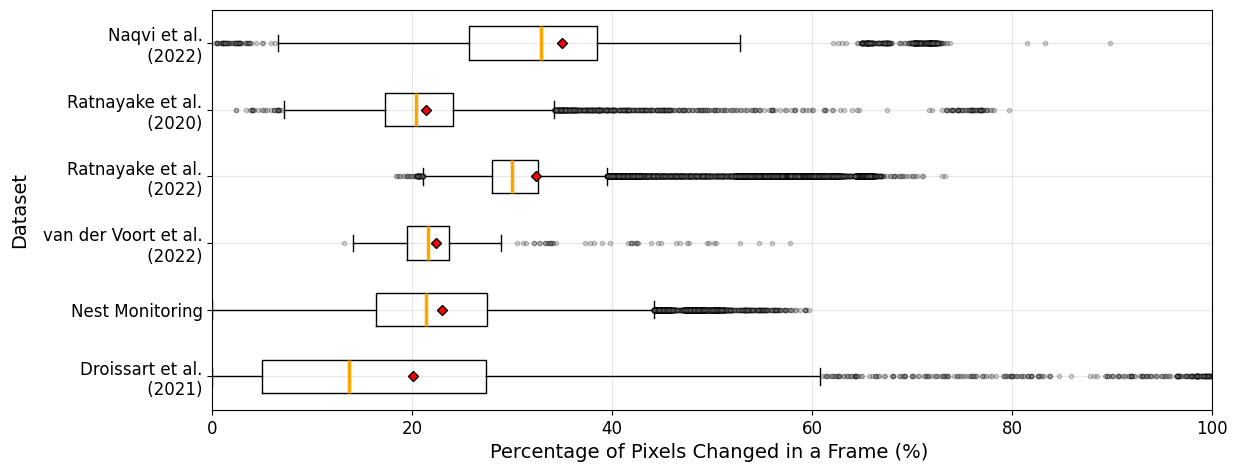

In [9]:
# Creating dataset
np.random.seed(10)
 
data_1 = bg_changes['Naqvi2022'].dropna().tolist()
data_2 = bg_changes['Ratnayake2021'].dropna().tolist()
data_3 = bg_changes['Ratnayake2023'].dropna().tolist()
data_4 = bg_changes['vanderVoort2022'].dropna().tolist()
data_5 = bg_changes['NestMonitoring'].dropna().tolist()
data_6 = bg_changes['PICT'].dropna().tolist()


# data = [data_1, data_2, data_3, data_4, data_5, data_6]
data = [data_6, data_5, data_4, data_3, data_2, data_1]
 
fig = plt.figure(figsize =(10, 4))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
fliers = dict(markerfacecolor='grey', marker='.', alpha = 0.25)
means= dict(marker='D', markerfacecolor='red', markeredgecolor='black', markersize=5)
median_props = dict(linestyle='-', linewidth=2.5, color='orange') 
 
# Creating plot
bp = ax.boxplot(data, flierprops=fliers, vert=False, showmeans=True, meanprops=means, medianprops=median_props)

# Adding x-axis labels
# ax.set_yticklabels(['Naqvi2022', 'Ratnayake2021', 'Ratnayake2023', 'vanderVoort2022', 'NestMonitoring', 'PICT'])
ax.set_yticklabels(['Droissart et al.\n (2021)', 'Nest Monitoring', 'van der Voort et al.\n (2022)', 'Ratnayake et al.\n (2022)', 'Ratnayake et al.\n (2020)', 'Naqvi et al.\n (2022)'], fontdict={'fontsize': 12})
ax.set_xlabel('Percentage of Pixels Changed in a Frame (%) ', fontdict={'fontsize': 14})
ax.set_ylabel('Dataset', fontdict={'fontsize': 14}, labelpad=10)
ax.set_xticklabels([0, 20, 40, 60, 80, 100], fontdict={'fontsize': 12})


ax.set_xlim(0, 100)
 
# show plot
plt.grid(alpha = 0.3)
plt.savefig('./Experiments/Figures/dataset_bg_changes.png', dpi=300, bbox_inches='tight')
plt.show()